In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [6]:
df['region'] = df['region'].map({
    'southeast':0,
    'southwest':1,
    'northwest':2,
    'northeast':3
})

In [7]:
df['smoker'] = df['smoker'].map({
    'yes':1,
    'no':0
})

In [8]:
sex = pd.get_dummies(df['sex'], drop_first=True)

In [9]:
df.drop(columns=['sex'], inplace=True)

In [10]:
df = pd.concat([df, sex], axis=1)

In [11]:
df

,age,bmi,children,smoker,region,charges,male
0,19,27.900,0,1,1,16884.92400,False
1,18,33.770,1,0,0,1725.55230,True
2,28,33.000,3,0,0,4449.46200,True
3,33,22.705,0,0,2,21984.47061,True
4,32,28.880,0,0,2,3866.85520,True
...,...,...,...,...,...,...,...
1333,50,30.970,3,0,2,10600.54830,True
1334,18,31.920,0,0,3,2205.98080,False
1335,18,36.850,0,0,0,1629.83350,False
1336,21,25.800,0,0,1,2007.94500,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   smoker    1338 non-null   int64  
 4   region    1338 non-null   int64  
 5   charges   1338 non-null   float64
 6   male      1338 non-null   bool   
dtypes: bool(1), float64(2), int64(4)
memory usage: 64.2 KB


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


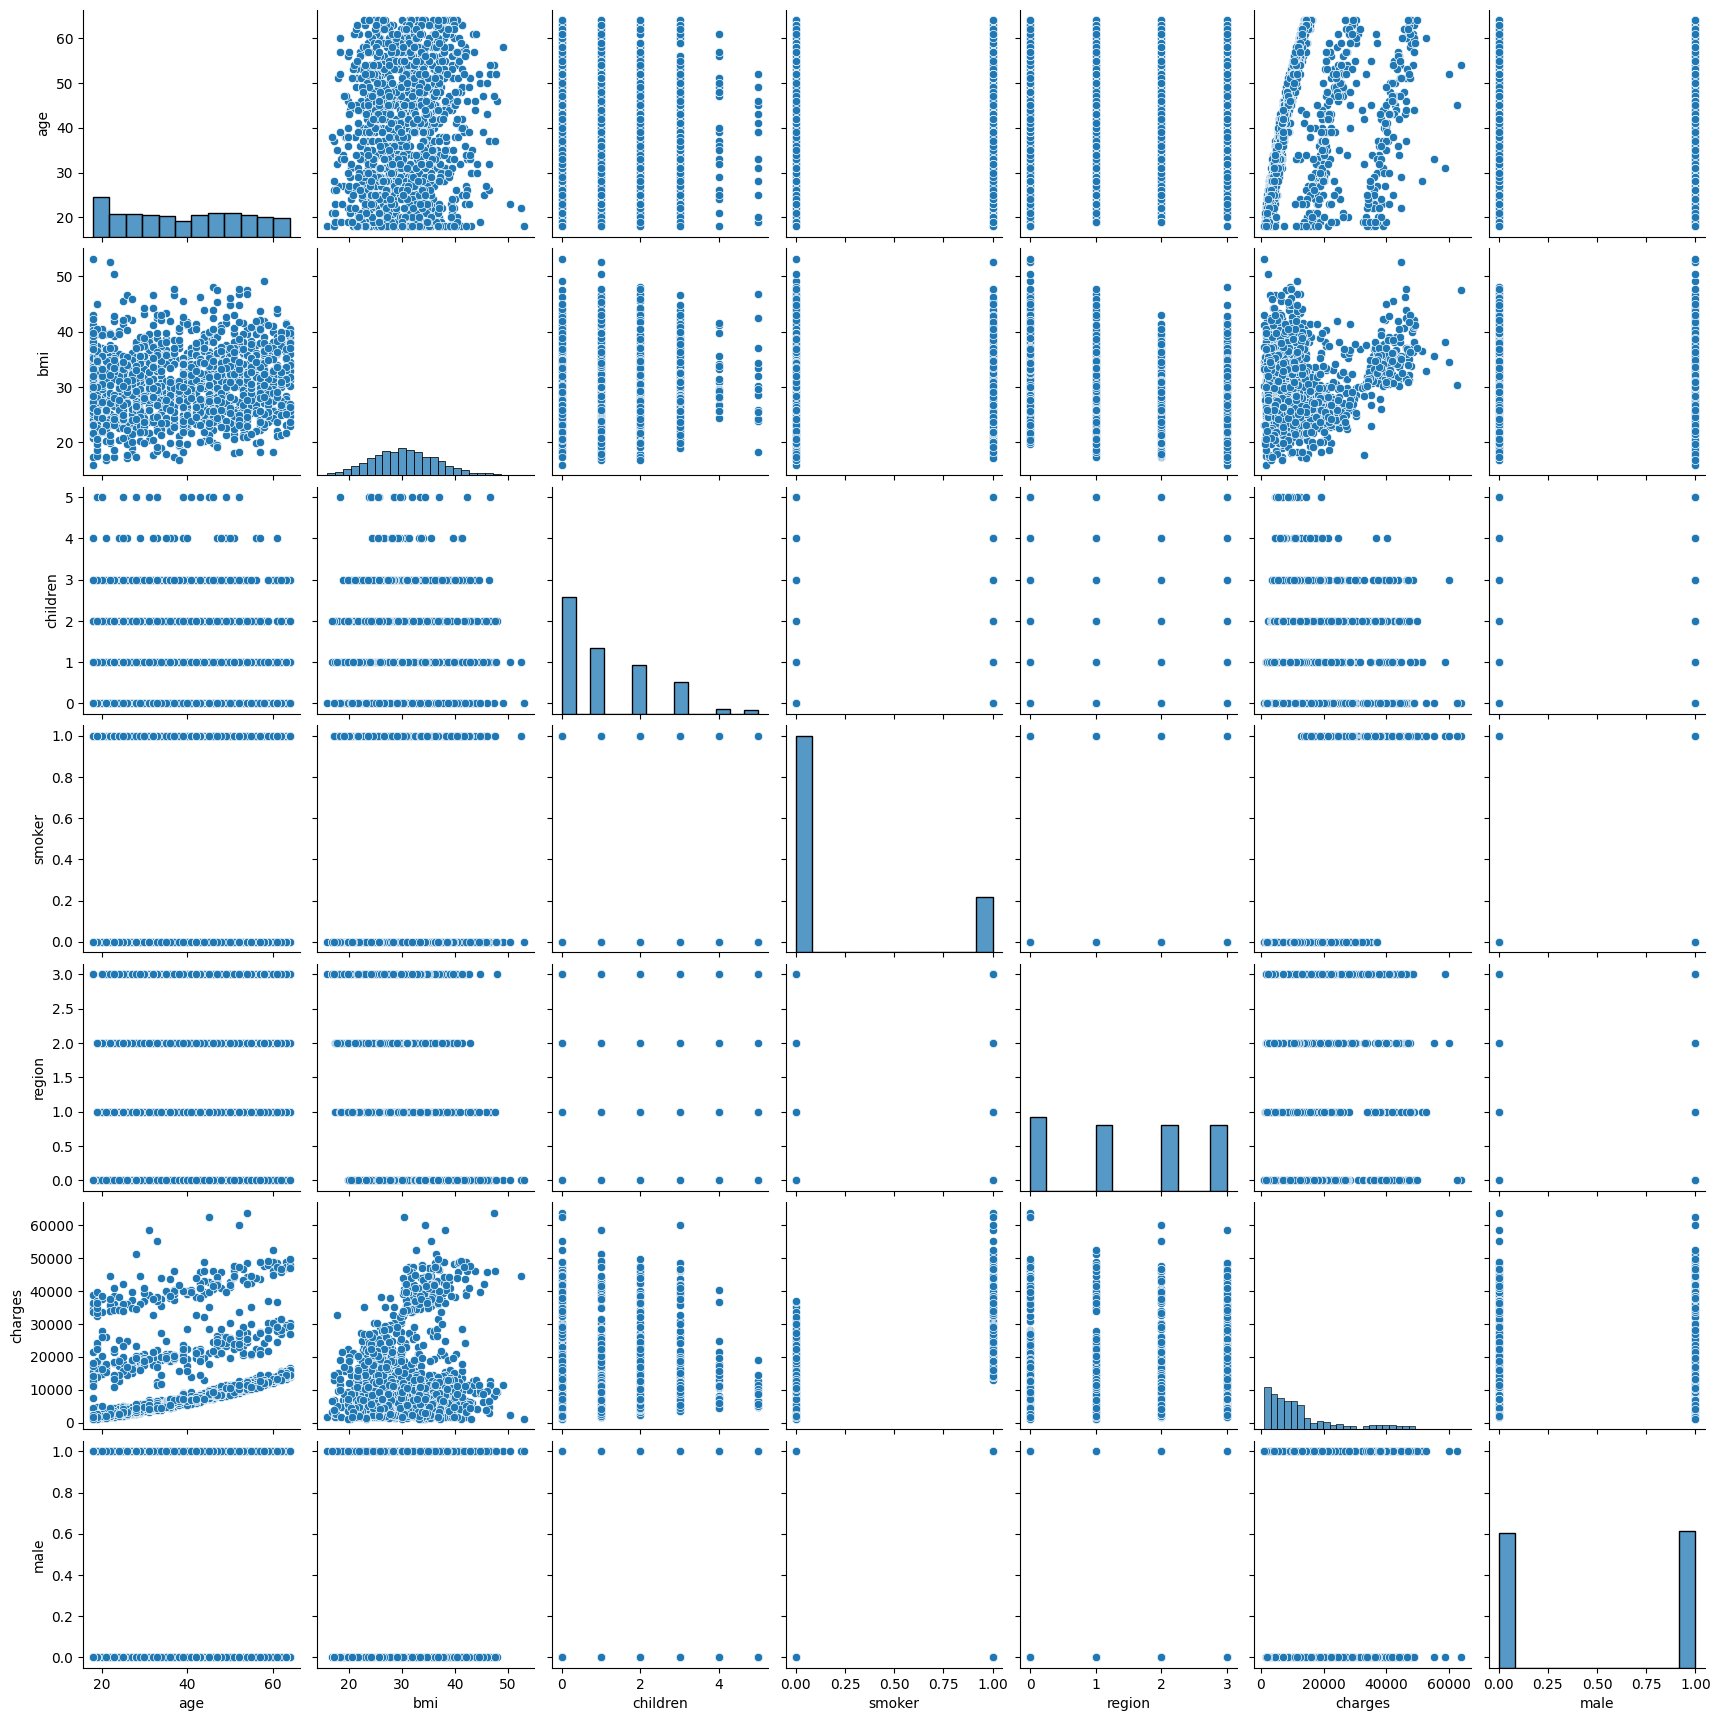

In [13]:
sns.pairplot(df)

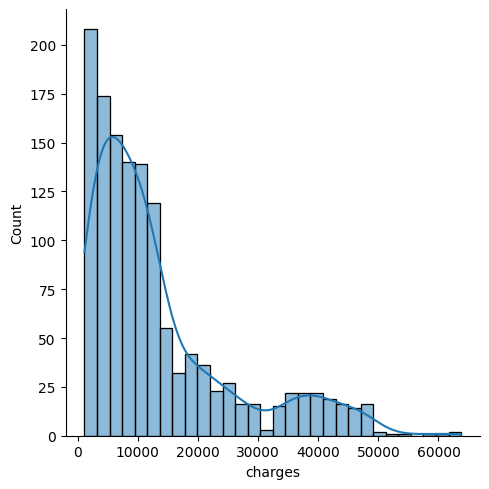

In [14]:
sns.displot(x='charges', data=df, kde=True)

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

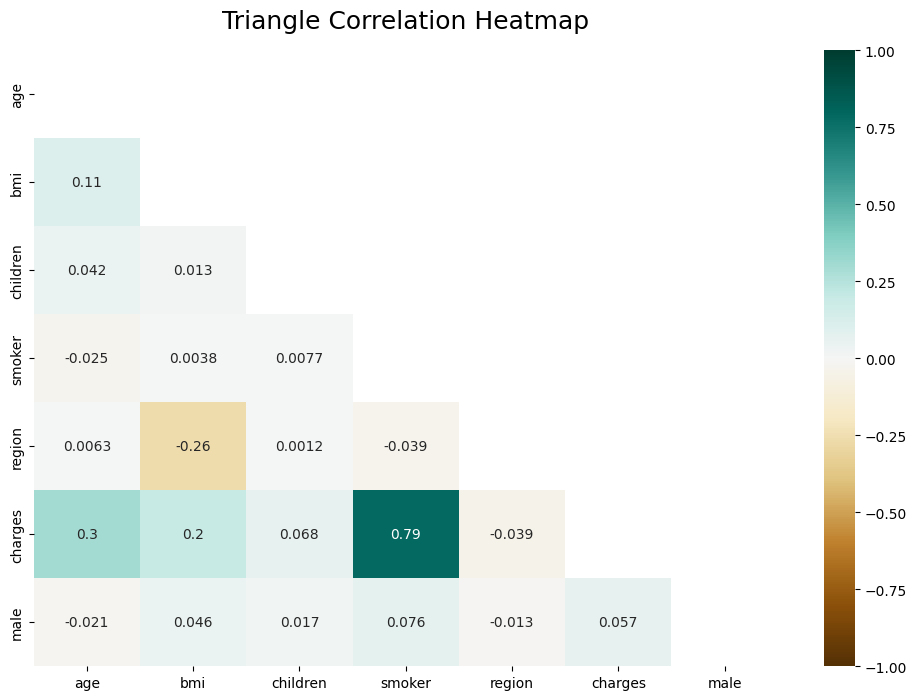

In [15]:
plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

In [16]:
X = df[['age', 'bmi', 'children', 'smoker', 'region', 'male']]
y = np.log(df['charges'])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
lr.score(X_train, y_train)

0.7606124448167646

In [20]:
lr.score(X_test, y_test)

0.7842847601049302

In [21]:
lr.intercept_

6.86099538207465

In [22]:
pd.DataFrame(lr.coef_, X.columns, columns=['Coef'])

,Coef
age,0.034490
bmi,0.013982
children,0.095141
smoker,1.553310
region,0.053685
male,-0.079022


In [23]:
pred = lr.predict(X_test)

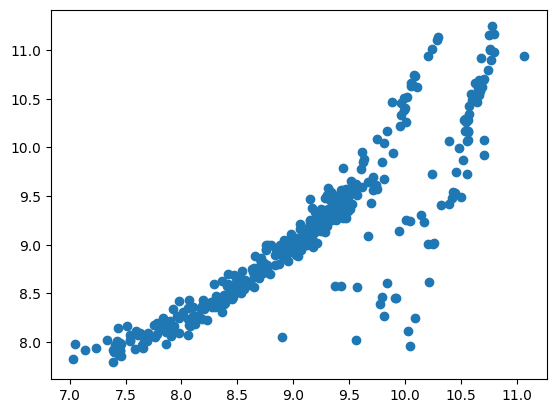

In [24]:
plt.scatter(y_test, pred)


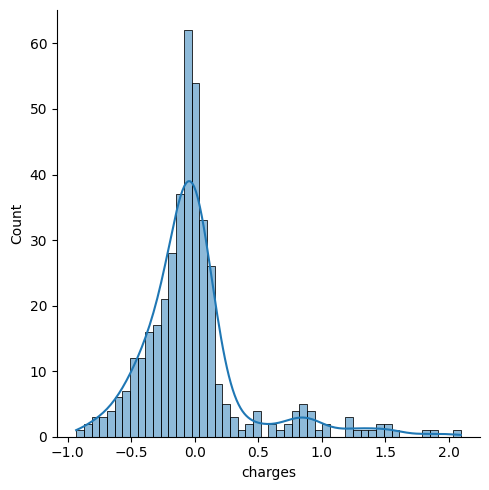

In [25]:
sns.displot((y_test-pred), bins=50, kde=True)

In [26]:
y_log = np.log(df['charges'])

In [38]:
X_train.shape

(936, 6)

In [39]:
y_train.shape

(936,)

In [37]:
y_log.shape

(1338,)

In [35]:
X.shape

(1338, 6)

In [40]:
X_train2.shape

(402, 6)

In [41]:
y_train2.shape

(936,)

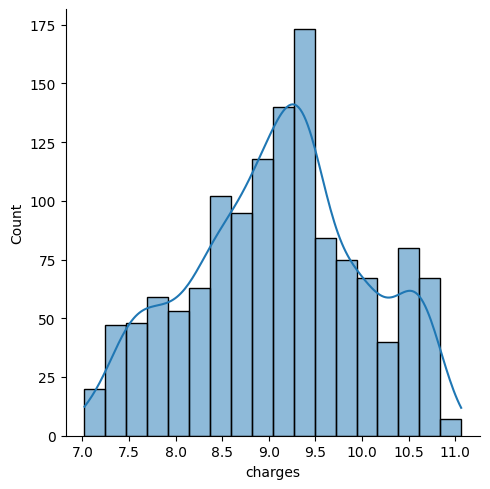

In [27]:
sns.displot(y_log, kde=True)

In [46]:
log_charges = np.log(y)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
X_train.shape

(1070, 6)

In [50]:
y_train.shape

(1070,)

In [51]:
X_test.shape

(268, 6)

In [52]:
y_test.shape

(268,)

In [53]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [54]:
lr.score(X_train, y_train)

0.757030589869179

In [55]:
lr.score(X_test, y_test)

0.8050359405442591

In [57]:
lr.intercept_

6.892407480183101

In [58]:
pd.DataFrame(lr.coef_, X.columns, columns=['Coef'])

,Coef
age,0.034214
bmi,0.013772
children,0.092329
smoker,1.553287
region,0.047429
male,-0.074319


In [59]:
pred = lr.predict(X_test)

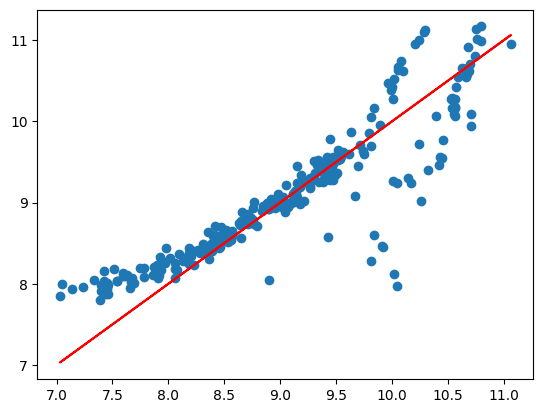

In [68]:
plt.scatter(y_test, pred)
plt.plot(y_test, y_test, color='red')

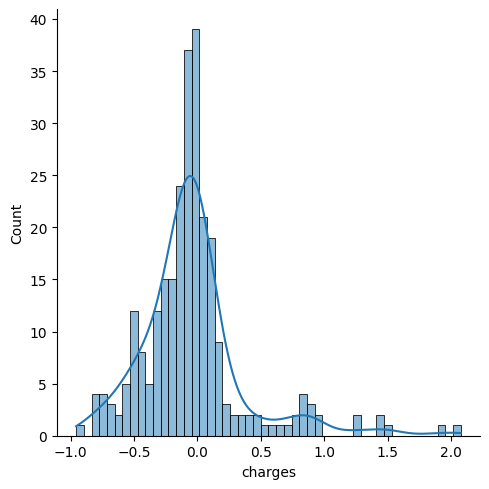

In [65]:
sns.displot((y_test-pred), bins=50, kde=True)

In [70]:
mre = np.sqrt(mean_squared_error(y_test, pred))

In [71]:
print(f'Nilai MRE: {mre}')

Nilai MRE: 0.41868856421916545


In [87]:
X_test.loc[650]

age            49
bmi         42.68
children        2
smoker          0
region          0
male        False
Name: 650, dtype: object

In [106]:
X_test_new_test = X_test

In [108]:
X_test_new_test['index'] = X_test_new_test.index

In [113]:
X_test_new_test = X_test_new_test.reset_index()

In [115]:
X_test_new_test.drop(columns=['level_0'], inplace=True)

In [133]:
X_test_new_test.loc[X_test_new_test['age']==49]

,age,bmi,children,smoker,region,male,index
9,49,28.690,3,0,2,True,650
16,49,42.680,2,0,0,False,650
114,49,30.780,1,0,3,False,650
127,49,29.830,1,0,3,True,650
145,49,25.600,2,1,1,True,650
170,49,21.300,1,0,1,False,650
229,49,41.470,4,0,0,False,650
235,49,36.850,0,0,0,True,650
258,49,22.515,0,0,3,True,650


In [136]:
X_test_new_test = pd.concat([X_test_new_test, pred_col], axis=1)

In [138]:
X_test_new_test.loc[X_test_new_test['age']==49]

,age,bmi,children,smoker,region,male,index,pred
9,49,28.690,3,0,2,True,650,9.261558
16,49,42.680,2,0,0,False,650,9.341361
114,49,30.780,1,0,3,False,650,9.227432
127,49,29.830,1,0,3,True,650,9.140029
145,49,25.600,2,1,1,True,650,10.632531
170,49,21.300,1,0,1,False,650,9.002013
229,49,41.470,4,0,0,False,650,9.509355
235,49,36.850,0,0,0,True,650,9.002093
258,49,22.515,0,0,3,True,650,8.946957


In [97]:
y_test

764      9.115488
887      8.570198
890     10.286400
1293     9.137973
259     10.426744
          ...    
109     10.759084
575      9.411066
535      8.710640
543     11.063045
846      9.197529
Name: charges, Length: 268, dtype: float64

In [93]:
pred_col = pd.DataFrame(pred, columns=['pred'])

In [94]:
pred_col

,pred
0,9.105710
1,8.632421
2,11.100533
3,9.118356
4,9.555913
...,...
263,11.010142
264,9.345885
265,8.738813
266,10.946205


In [79]:
df[df['bmi'] == df['bmi'].max()]

,age,bmi,children,smoker,region,charges,male
1317,18,53.13,0,0,0,1163.4627,True
